# Run validation tests of HippoUnit on the Gómez González et al. 2011 model of hippocampal CA1 pyramidal cell

The purpose of this notebook is to show how to run the validation tests of HippoUnit (https://github.com/KaliLab/hippounit) on the Gómez González et al. 2011 CA1 pyramidal cell model (ModelDB accession number: 144450).

The tests shall take as input a standalone version of the model (a hoc file) that should not display any GUI, or contain any built in simulations and run-time modifications.
__In this notebook the version of the model is tested that uses the n128 morphology__. 
The hoc file that is used in this notebook is available here:
https://github.com/KaliLab/HippoUnit_demo/blob/master/published_models/CA1_Gomez_2011/experiment/junio/main_model_n128_morph.hoc

Target experimental data that are used by the validation tests in this notebook are available here: 
https://github.com/KaliLab/HippoUnit_demo/tree/master/target_features

In [1]:
from __future__ import print_function

%matplotlib inline

from hippounit.utils import ModelLoader
from hippounit import tests

from json2html import *
import pkg_resources
import json
import collections
import numpy
import IPython

## Instantiating the model

The ModelLoader class of HippoUnit is instantiated and the model, and simulation related parameters are set.

In [2]:
# path to mod files
mod_files_path = "../published_models/CA1_Gomez_2011/mechanism/"

#all the outputs will be saved here. It will be an argument to the test.
base_directory = '../published_models_validation_results/'

#Load cell model
model = ModelLoader(mod_files_path = mod_files_path )

# outputs will be saved in subfolders named like this:
model.name="Gomez_Gonzalez_2011_n128_morph"

# path to hoc file
# the model must not display any GUI!!
model.hocpath = "../published_models/CA1_Gomez_2011/experiment/junio/main_model_n128_morph.hoc"

# If the hoc file doesn't contain a template, this must be None (the default value is None)
model.template_name = None

# model.SomaSecList_name should be None, if there is no Section List in the model for the soma, or if the name of the soma section is given by setting model.soma (the default value is None)
model.SomaSecList_name = None
# if the soma is not in a section list or to use a specific somatic section, add its name here:
model.soma = 'soma[0]'

# For the PSP Attenuation Test, and Back-propagating AP Test a section list containing the trunk sections is needed
model.TrunkSecList_name = 'apical_trunk_list'
# For the Oblique Integration Test a section list containing the oblique dendritic sections is needed
model.ObliqueSecList_name = 'oblique_dendrites'

# It is important to set the v_init and the celsius parameters of the simulations here,
# as if they are only set in the model's files, they will be overwritten with the default values of the ModelLoader class.
# default values: v_init = -70, celsius = 34 
model.v_init = -66
model.celsius = 34


## Instantiating and running the tests of HippoUnit on the model

At the end of each test, the user is provided with a textual summary of the score and the path to related output files generated by the tests.

### Somatic Features Test - UCL data set

It evaluates the model against various eFEL (https://github.com/BlueBrain/eFEL) features under somatic current injection of varying amplitudes. The experimental dataset used for validation is obtained from sharp electrode recordings in rats at UCL (Migliore et al. 2018  https://doi.org/10.1371/journal.pcbi.1006423).

In [3]:
# Load target data
with open('../target_features/feat_CA1_pyr_cACpyr_more_features.json') as f:
    observation = json.load(f, object_pairs_hook=collections.OrderedDict)

- running amplitude: 0.2 on model: Gomez_Gonzalez_2011_n128_morph at: soma[0](0.5)
- running amplitude: -0.4 on model: Gomez_Gonzalez_2011_n128_morph at: soma[0](0.5)
- running amplitude: -0.2 on model: Gomez_Gonzalez_2011_n128_morph at: soma[0](0.5)
- running amplitude: -0.6 on model: Gomez_Gonzalez_2011_n128_morph at: soma[0](0.5)
- running amplitude: -0.8 on model: Gomez_Gonzalez_2011_n128_morph at: soma[0](0.5)
- running amplitude: 0.4 on model: Gomez_Gonzalez_2011_n128_morph at: soma[0](0.5)
- running amplitude: 0.6 on model: Gomez_Gonzalez_2011_n128_morph at: soma[0](0.5)
- running amplitude: -1.0 on model: Gomez_Gonzalez_2011_n128_morph at: soma[0](0.5)
- running amplitude: 0.8 on model: Gomez_Gonzalez_2011_n128_morph at: soma[0](0.5)
- running amplitude: 1.0 on model: Gomez_Gonzalez_2011_n128_morph at: soma[0](0.5)
The figures are saved in the directory:  ../published_models_validation_results/figs/somaticfeat_UCL_data/Gomez_Gonzalez_2011_n128_morph/
Number of features succesfu

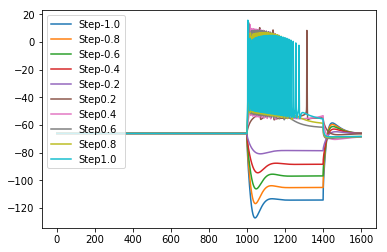

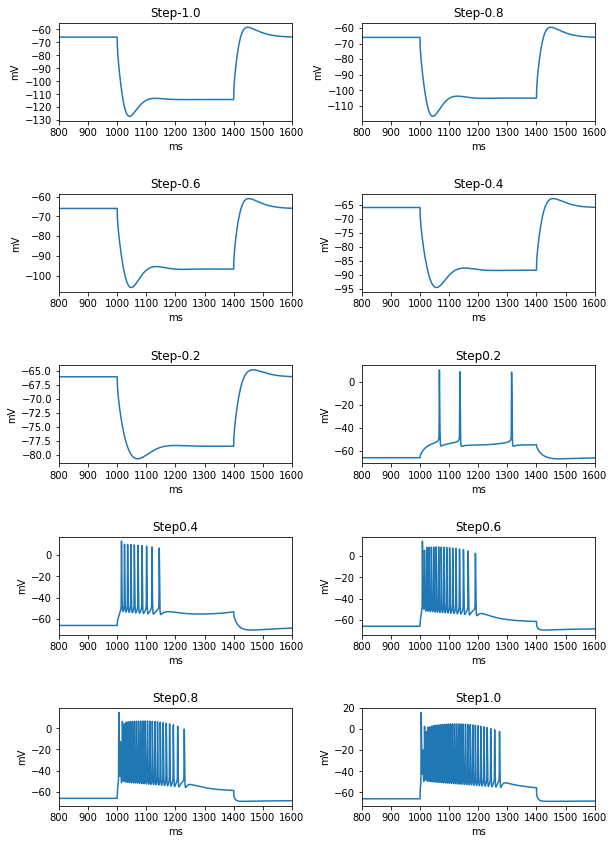

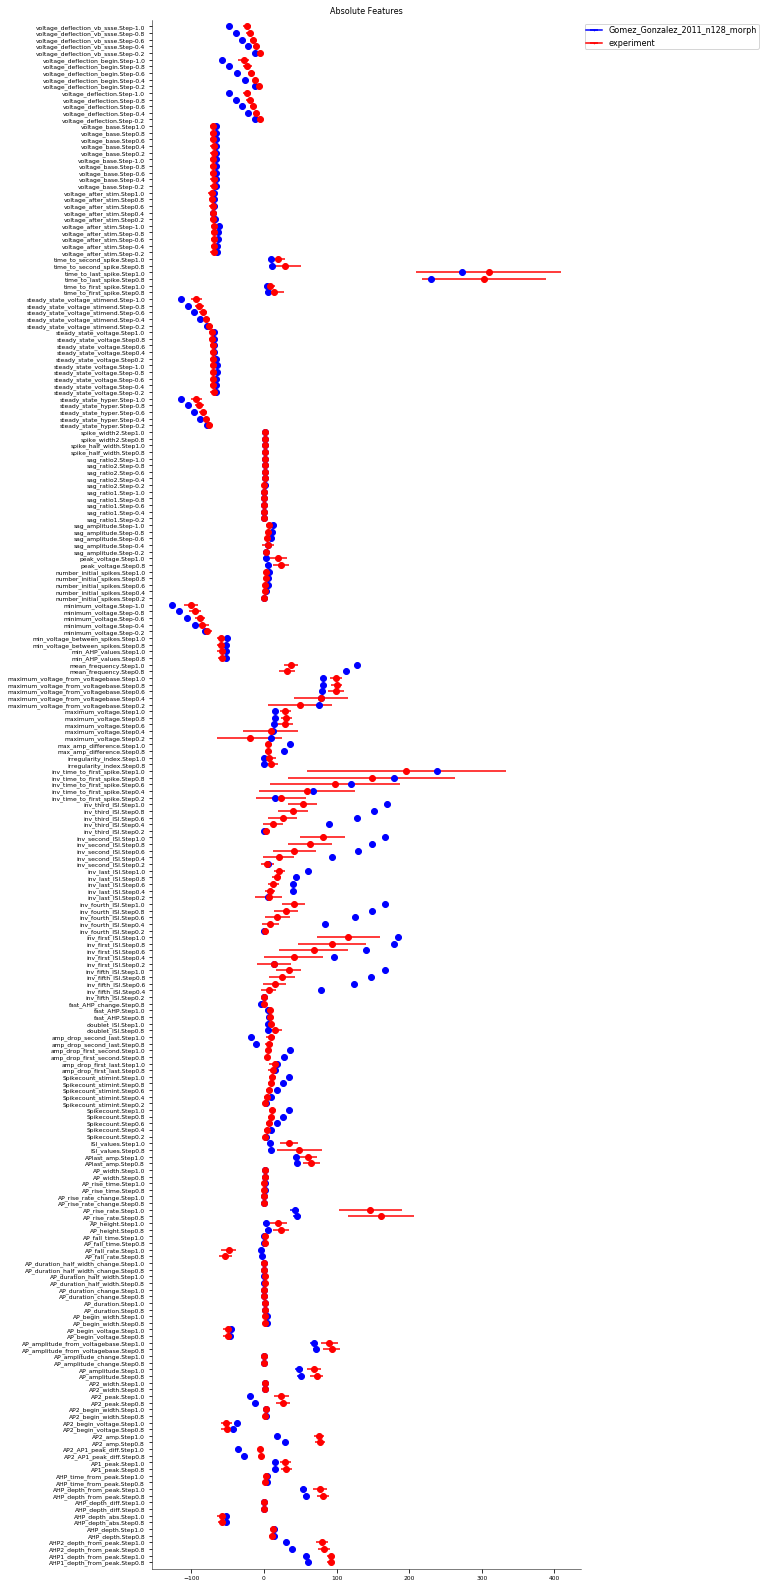

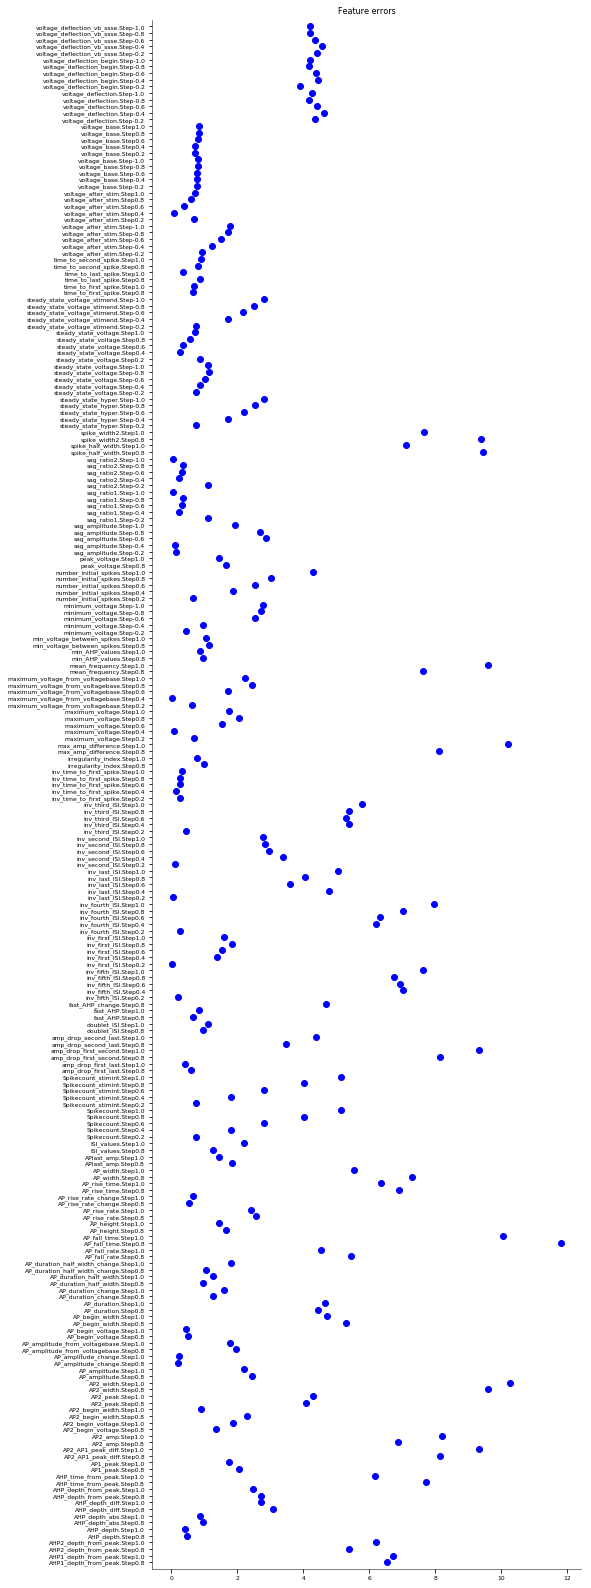

In [4]:
# Load stimuli file
ttype = "CA1_pyr_cACpyr"

stim_file = pkg_resources.resource_filename("hippounit", "tests/stimuli/somafeat_stim/stim_" + ttype + ".json")
with open(stim_file, 'r') as f:
    config = json.load(f, object_pairs_hook=collections.OrderedDict)
    
# Instantiate test class   
test = tests.SomaticFeaturesTest(observation=observation, config=config, force_run=False, show_plot=True, save_all = True, base_directory=base_directory)

# test.specify_data_set is added to the name of the subdirectory (somaticfeat), so test runs using different data sets can be saved into different directories
test.specify_data_set = 'UCL_data'

# Number of parallel processes
test.npool = 10
    
try:
    #Run the test 
    score = test.judge(model)
    #Summarize and print the score achieved by the model on the test using SciUnit's summarize function
    score.summarize()
except Exception as e:
    print('Model: ' + model.name + ' could not be run')
    print(e)
    pass

### Somatic Features Test - JMakara data set

It evaluates the model against various eFEL (https://github.com/BlueBrain/eFEL) features under somatic current injection of varying amplitudes. The experimental dataset used for validation is obtained from patch clamp recordings in rats by Judit Makara.

In [5]:
# Load target data
with open('../target_features/feat_rat_CA1_JMakara_more_features.json') as f:
    observation = json.load(f, object_pairs_hook=collections.OrderedDict)

- running amplitude: 0.2 on model: Gomez_Gonzalez_2011_n128_morph at: soma[0](0.5)
- running amplitude: 0.1 on model: Gomez_Gonzalez_2011_n128_morph at: soma[0](0.5)
- running amplitude: -0.2 on model: Gomez_Gonzalez_2011_n128_morph at: soma[0](0.5)
- running amplitude: 0.15 on model: Gomez_Gonzalez_2011_n128_morph at: soma[0](0.5)
- running amplitude: -0.05 on model: Gomez_Gonzalez_2011_n128_morph at: soma[0](0.5)
- running amplitude: 0.05 on model: Gomez_Gonzalez_2011_n128_morph at: soma[0](0.5)
- running amplitude: -0.25 on model: Gomez_Gonzalez_2011_n128_morph at: soma[0](0.5)
- running amplitude: -0.1 on model: Gomez_Gonzalez_2011_n128_morph at: soma[0](0.5)
- running amplitude: 0.25 on model: Gomez_Gonzalez_2011_n128_morph at: soma[0](0.5)
- running amplitude: -0.15 on model: Gomez_Gonzalez_2011_n128_morph at: soma[0](0.5)


/home/saray/venv_Python3/lib/python3.5/site-packages/efel/api.py:480: RuntimeWarning: Error while calculating feature AHP_depth: 
Voltage never goes below or above threshold in spike detection.

 At least one spike required for calculation of min_AHP_indices.

Feature [min_AHP_values] is missing

  RuntimeWarning)
/home/saray/venv_Python3/lib/python3.5/site-packages/efel/api.py:480: RuntimeWarning: Error while calculating feature AHP_depth_abs: 
Voltage never goes below or above threshold in spike detection.

 At least one spike required for calculation of min_AHP_indices.

Feature [min_AHP_values] is missing

  RuntimeWarning)
/home/saray/venv_Python3/lib/python3.5/site-packages/efel/api.py:480: RuntimeWarning: Error while calculating feature AHP_depth_diff: 
Voltage never goes below or above threshold in spike detection.

 At least one spike required for calculation of min_AHP_indices.

Feature [min_AHP_values] is missing

Feature [AHP_depth] is missing

  RuntimeWarning)
/home/saray

/home/saray/venv_Python3/lib/python3.5/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/saray/venv_Python3/lib/python3.5/site-packages/numpy/core/_methods.py:110: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/home/saray/venv_Python3/lib/python3.5/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/saray/venv_Python3/lib/python3.5/site-packages/efel/api.py:480: RuntimeWarning: Error while calculating feature AP_rise_time: 
Voltage never goes below or above threshold in spike detection.

 At least one spike required for calculation of min_AHP_indices.

Feature [min_AHP_indices] is missing

Feature [AP_begin_indices] is missing

  RuntimeWarning)
/home/saray/venv_Python3/lib/python3.5/site-packages/efel/api.py:480: RuntimeWarning: Error while calculating 

/home/saray/venv_Python3/lib/python3.5/site-packages/efel/api.py:480: RuntimeWarning: Error while calculating feature spike_half_width: 
Voltage never goes below or above threshold in spike detection.

 At least one spike required for calculation of min_AHP_indices.

Feature [min_AHP_indices] is missing

  RuntimeWarning)
/home/saray/venv_Python3/lib/python3.5/site-packages/efel/api.py:480: RuntimeWarning: Error while calculating feature spike_width2: 
Voltage never goes below or above threshold in spike detection.

 At least one spike required for calculation of min_AHP_indices.

Feature [min_AHP_indices] is missing

  RuntimeWarning)
/home/saray/venv_Python3/lib/python3.5/site-packages/efel/api.py:480: RuntimeWarning: Error while calculating feature time_to_first_spike: 
Voltage never goes below or above threshold in spike detection.

 One spike required for time_to_first_spike.

  RuntimeWarning)
/home/saray/venv_Python3/lib/python3.5/site-packages/efel/api.py:480: RuntimeWarning: E

The figures are saved in the directory:  ../published_models_validation_results/figs/somaticfeat_JMakara_data/Gomez_Gonzalez_2011_n128_morph/
Features excluded (due to invalid values): AHP1_depth_from_peak.Step0.15, AHP2_depth_from_peak.Step0.15, AHP_depth.Step0.15, AHP_depth_abs.Step0.15, AHP_depth_diff.Step0.15, AHP_depth_from_peak.Step0.15, AHP_time_from_peak.Step0.15, AP1_peak.Step0.15, AP2_AP1_peak_diff.Step0.15, AP2_amp.Step0.15, AP2_begin_voltage.Step0.15, AP2_begin_width.Step0.15, AP2_peak.Step0.15, AP2_width.Step0.15, AP_amplitude.Step0.15, AP_amplitude_change.Step0.15, AP_amplitude_from_voltagebase.Step0.15, AP_begin_voltage.Step0.15, AP_begin_width.Step0.15, AP_duration.Step0.15, AP_duration_change.Step0.15, AP_duration_change.Step0.2, AP_duration_half_width.Step0.15, AP_duration_half_width_change.Step0.15, AP_duration_half_width_change.Step0.2, AP_fall_rate.Step0.15, AP_fall_time.Step0.15, AP_height.Step0.15, AP_rise_rate.Step0.15, AP_rise_rate_change.Step0.15, AP_rise_rate

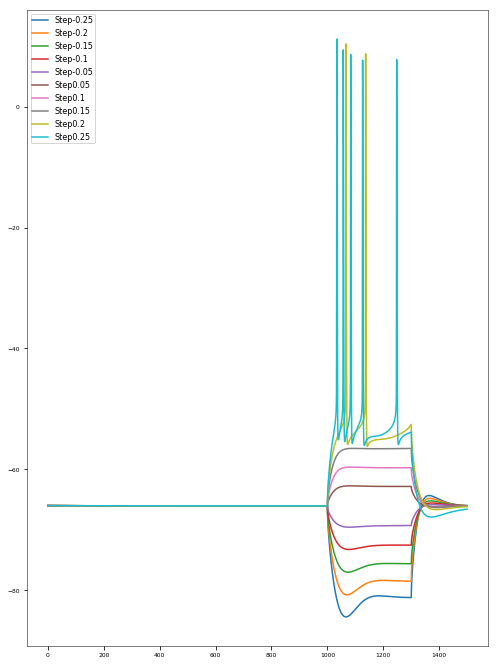

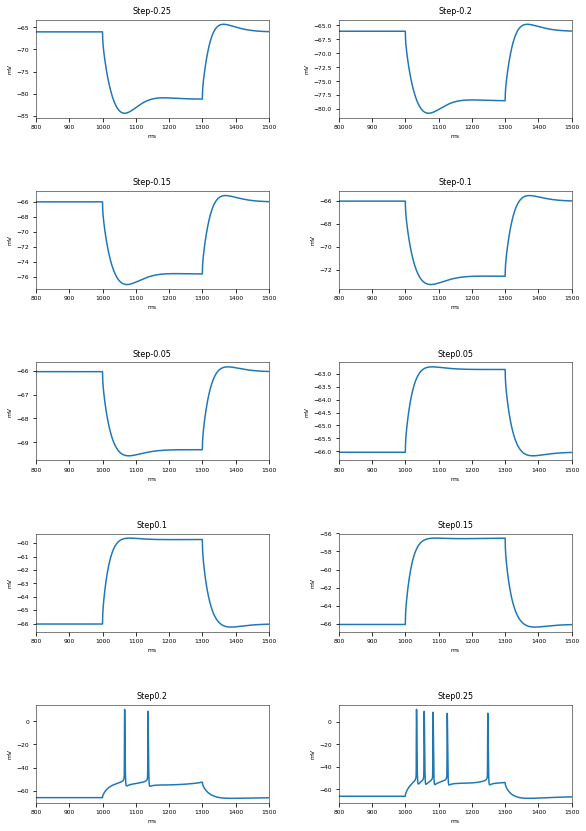

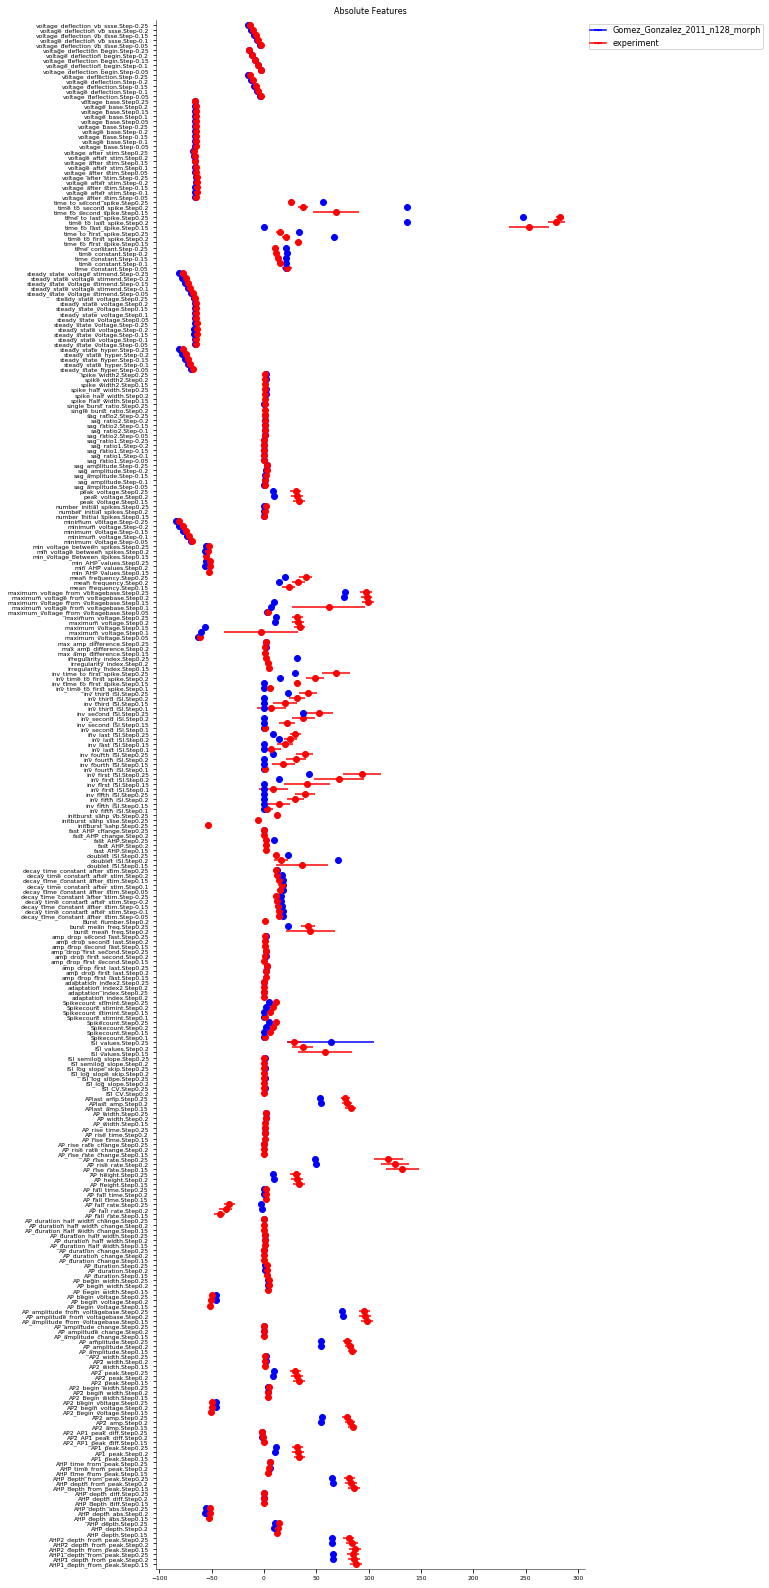

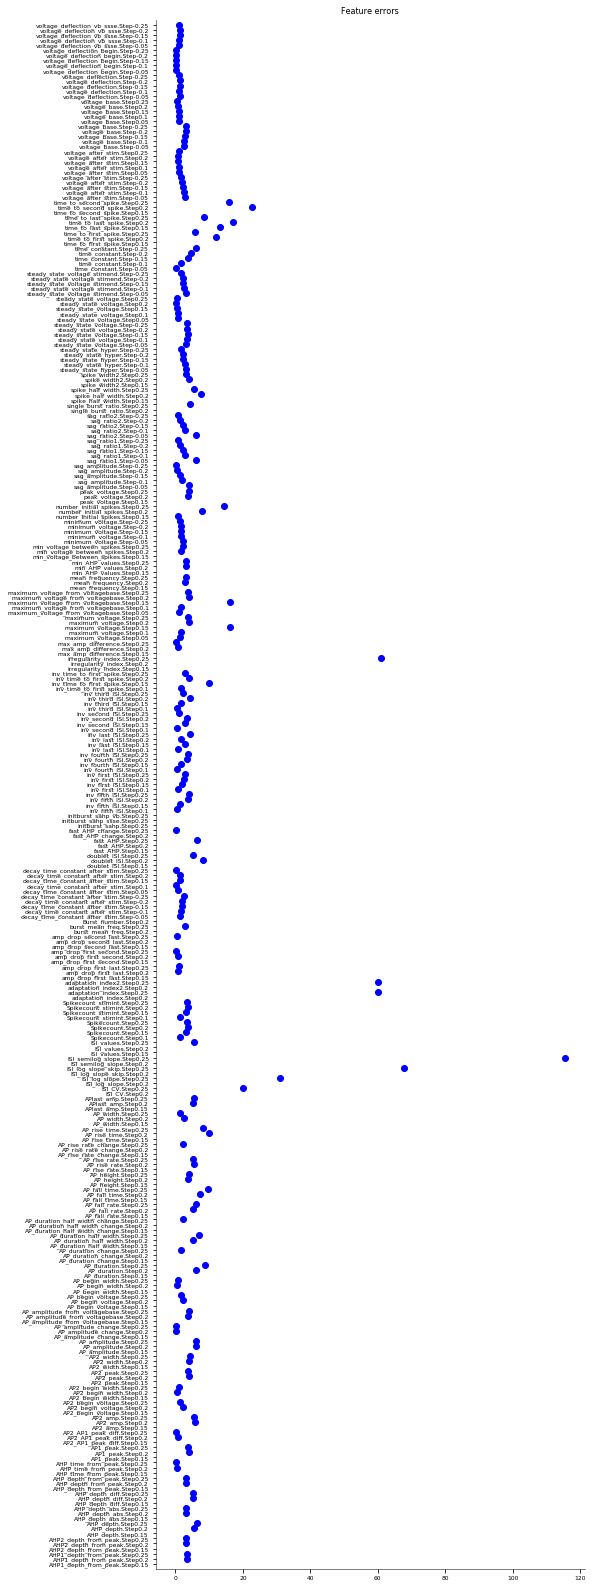

In [6]:
# Load stimuli file
stim_file = pkg_resources.resource_filename("hippounit", "tests/stimuli/somafeat_stim/stim_rat_CA1_PC_JMakara.json")
with open(stim_file, 'r') as f:
    config = json.load(f, object_pairs_hook=collections.OrderedDict)
    
# Instantiate test class   
test = tests.SomaticFeaturesTest(observation=observation, config=config, force_run=False, show_plot=True, save_all = True, base_directory=base_directory)

# test.specify_data_set is added to the name of the subdirectory (somaticfeat), so test runs using different data sets can be saved into different directories
test.specify_data_set = 'JMakara_data'

# Number of parallel processes
test.npool = 10

try:
    #Run the test 
    score = test.judge(model)
    #Summarize and print the score achieved by the model on the test using SciUnit's summarize function
    score.summarize()
except Exception as e:
    print('Model: ' + model.name + ' could not be run')
    print(e)
    pass

### PSP Attenuatuion Test

The PSP Attenuation Test evaluates how much the post synaptic potential (using EPSC stimulus) attenuates from the main apical dendrite (different distances) to the soma. The soma/dendrite attenuation is compared to data from Magee & Cook 2000 (http://dx.doi.org/10.1038/78800).

In [7]:
# Load target data
with open("../target_features/feat_PSP_attenuation_target_data.json", 'r') as f:
    observation = json.load(f, object_pairs_hook=collections.OrderedDict)

IPython.display.HTML(json2html.convert(json = observation))

mean_attenuation_soma/dend_100_um,0.67037891837
std_attenuation_soma/dend_100_um,0.0745536001493
mean_attenuation_soma/dend_200_um,0.485024302539
std_attenuation_soma/dend_200_um,0.108372269307
mean_attenuation_soma/dend_300_um,0.282118043034
std_attenuation_soma/dend_300_um,0.0482703550105


Dendritic locations to be tested (with their actual distances): {('trunk[0]', 0.8999999999999999): 107.18338675606768, ('trunk[7]', 0.7): 323.5615623584028, ('trunk[4]', 0.8999999999999999): 251.53764553808594, ('trunk[4]', 0.1): 231.252390292558, ('trunk[3]', 0.30000000000000004): 197.81852958164, ('trunk[1]', 0.7): 133.67344351146681, ('trunk[2]', 0.1): 147.0310408362326, ('trunk[4]', 0.7): 246.46633172670397, ('trunk[3]', 0.1): 188.99047135157517, ('trunk[5]', 0.7): 265.8784569057232, ('trunk[1]', 0.5): 127.54951947275707, ('trunk[2]', 0.7): 172.06130843643933, ('trunk[3]', 0.5): 206.64658781170488, ('trunk[7]', 0.5): 309.9748021722534, ('trunk[5]', 0.1): 255.7597530811978}
input at: trunk[2](0.1) with weight: 0.0
input at: trunk[4](0.8999999999999999) with weight: 0.0
input at: trunk[3](0.5) with weight: 0.0
input at: trunk[5](0.7) with weight: 0.0
input at: trunk[4](0.7) with weight: 0.0
input at: trunk[2](0.7) with weight: 0.0
input at: trunk[4](0.1) with weight: 0.0
input at: tr

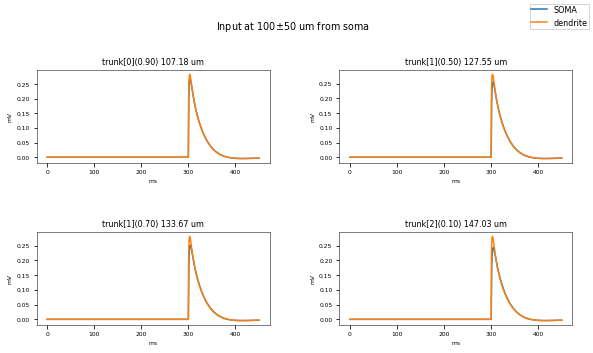

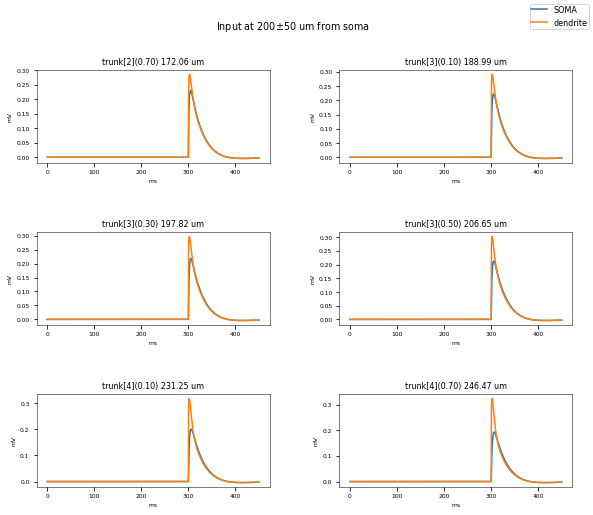

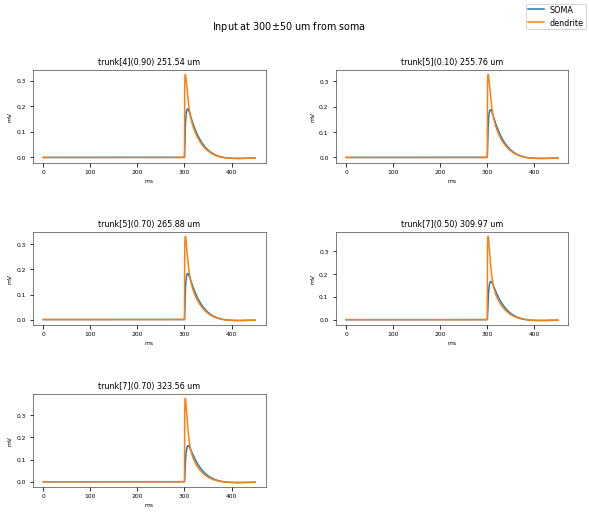

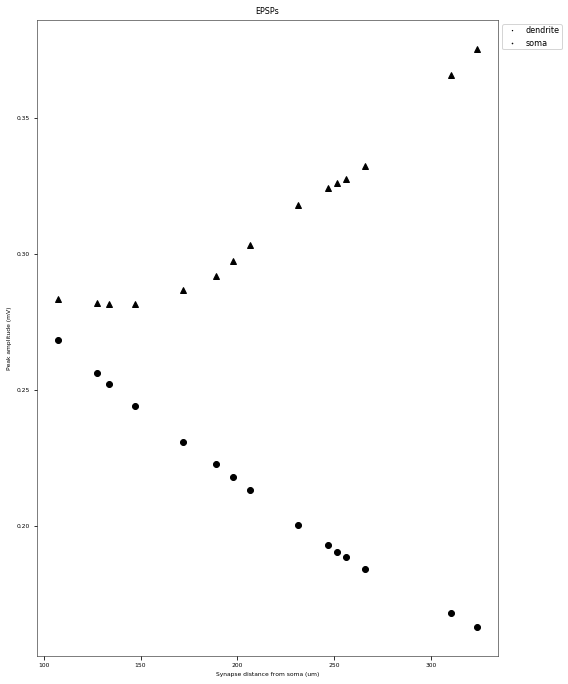

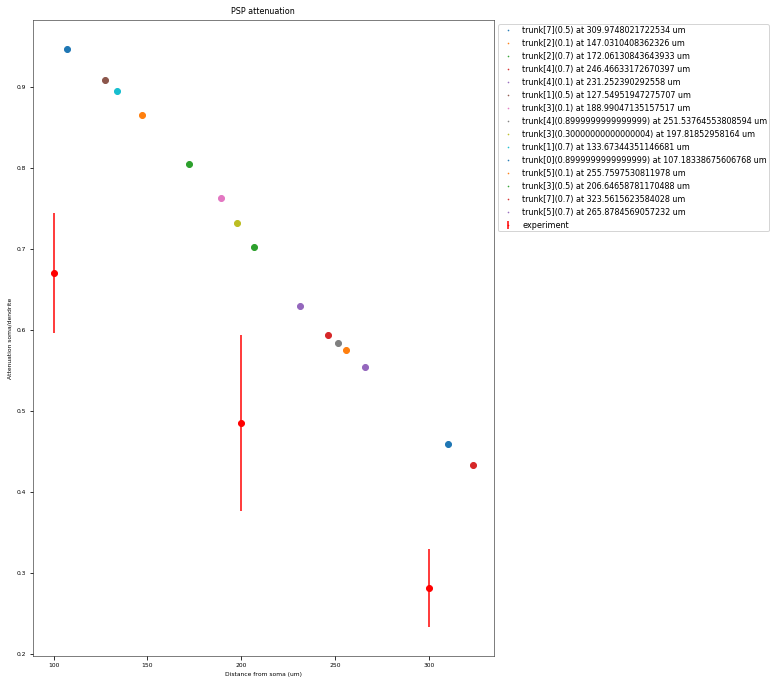

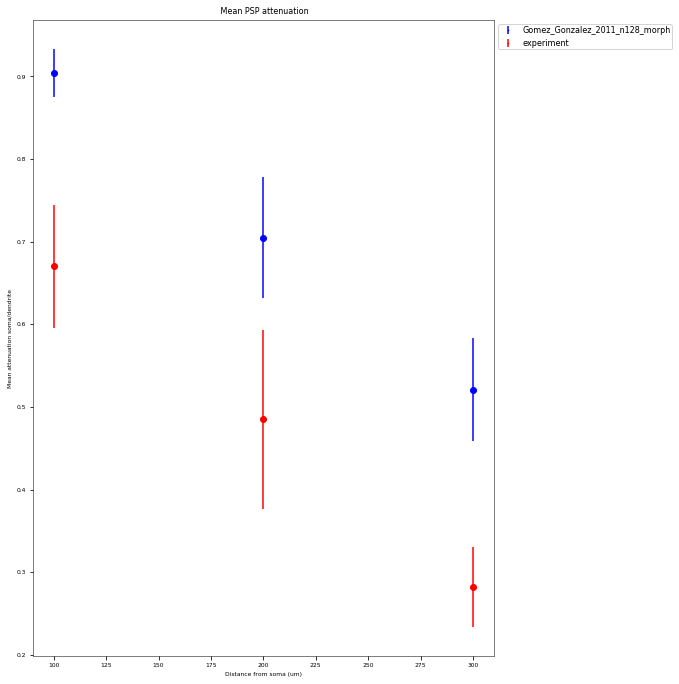

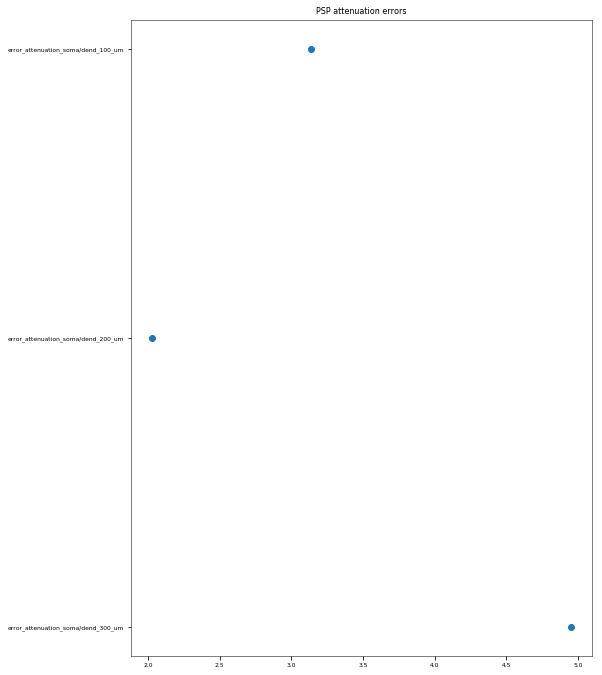

In [8]:
# Load stimuli file
stim_file = pkg_resources.resource_filename("hippounit", "tests/stimuli/PSP_attenuation_stim/stim_PSP_attenuation_test.json")

with open(stim_file, 'r') as f:
    config = json.load(f, object_pairs_hook=collections.OrderedDict)

# Instantiate test class 
test = tests.PSPAttenuationTest(config=config, observation=observation, num_of_dend_locations = 15, force_run=False, show_plot=True, save_all = True, base_directory=base_directory)
            
# Number of parallel processes
test.npool = 10

try: 
    # Run the test 
    score = test.judge(model)
    #Summarize and print the score achieved by the model on the test using SciUnit's summarize function
    score.summarize()
except Exception as e:
    print('Model: ' + model.name + ' could not be run')
    print(e)
    pass 

### Back-Propagating AP Test

The Back-Propagating AP Test evaluates the mode and efficacy of back-propagating action potentials on the apical trunk in locations of different distances from the soma. The amplitude of the first and last AP of around 15 Hz train is compared to experimental data from Golding et al. 2001 (https://doi.org/10.1152/jn.2001.86.6.2998).

In [9]:
# Load target data
with open('../target_features/feat_backpropagating_AP_target_data.json') as f:
    observation = json.load(f, object_pairs_hook=collections.OrderedDict)

IPython.display.HTML(json2html.convert(json = observation))

mean_AP1_amp_at_50um,66.6474010216 mV
std_AP1_amp_at_50um,7.6800611053 mV
mean_AP1_amp_at_150um,61.6405452338 mV
std_AP1_amp_at_150um,8.84061901299 mV
mean_AP1_amp_at_250um,57.1478276286 mV
std_AP1_amp_at_250um,6.74288151869 mV
mean_AP1_amp_strong_propagating_at_350um,52.5065653152 mV
std_AP1_amp_strong_propagating_at_350um,5.82443856294 mV
mean_AP1_amp_weak_propagating_at_350um,18.7832282514 mV
std_AP1_amp_weak_propagating_at_350um,1.87203344953 mV
mean_APlast_amp_at_50um,56.0027067193 mV


Dendritic locations to be tested (with their actual distances): {('trunk[10]', 0.7): 366.17438322626305, ('trunk[8]', 0.8999999999999999): 350.37037156624064, ('trunk[7]', 0.8999999999999999): 337.1483225445522, ('trunk[5]', 0.5): 262.5055556308814, ('trunk[8]', 0.30000000000000004): 346.08459228049816, ('trunk[1]', 0.8999999999999999): 139.79736755017655, ('trunk[2]', 0.1): 147.0310408362326, ('trunk[4]', 0.5): 241.395017915322, ('trunk[10]', 0.1): 364.6991434565502, ('trunk[9]', 0.7): 360.442689547278, ('trunk[10]', 0.30000000000000004): 365.1908900464545, ('trunk[1]', 0.7): 133.67344351146681, ('trunk[2]', 0.5): 163.7178859030371, ('trunk[8]', 0.5): 347.51318537574565, ('trunk[2]', 0.30000000000000004): 155.37446336963484, ('trunk[11]', 0.1): 369.5205188366303, ('trunk[4]', 0.7): 246.46633172670397, ('trunk[5]', 0.30000000000000004): 259.1326543560396, ('trunk[9]', 0.1): 352.42152831863774, ('trunk[8]', 0.1): 344.65599918525066, ('trunk[9]', 0.5): 357.7689691377313, ('trunk[8]', 0.7

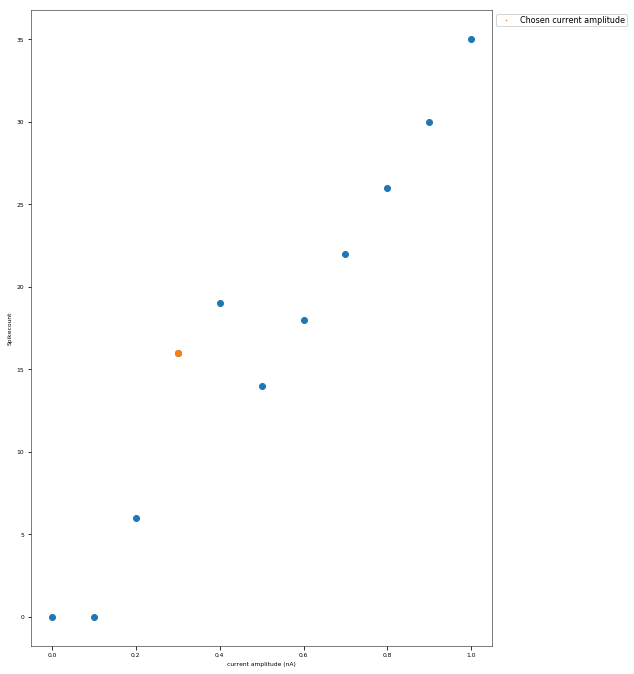

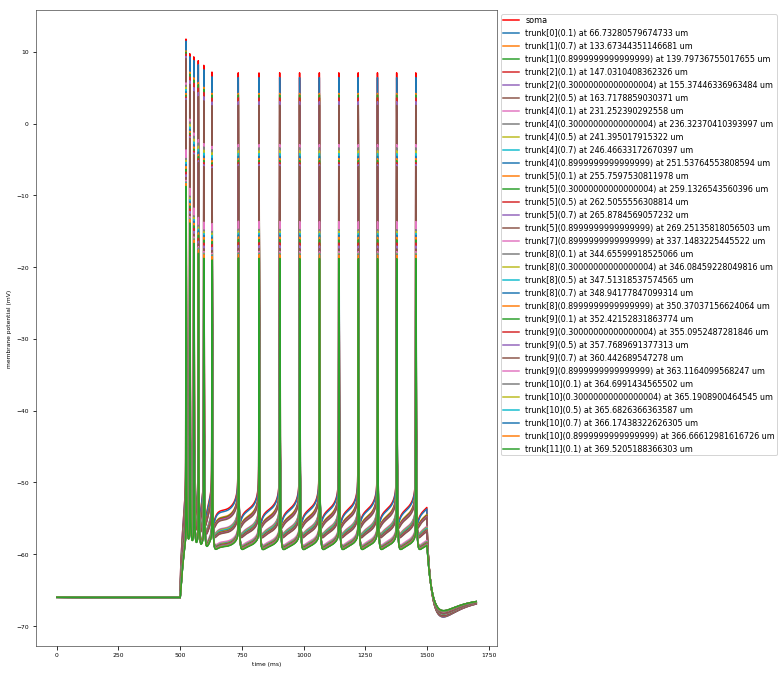

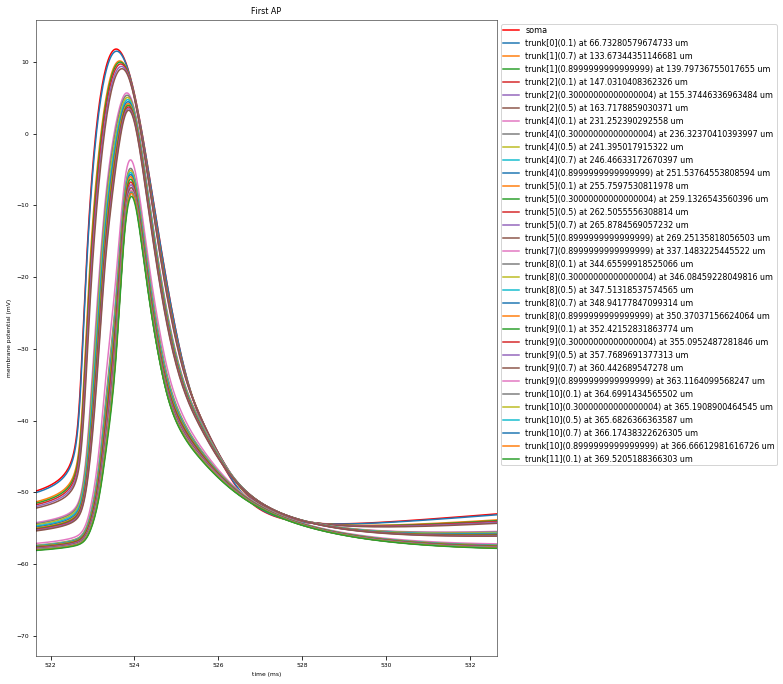

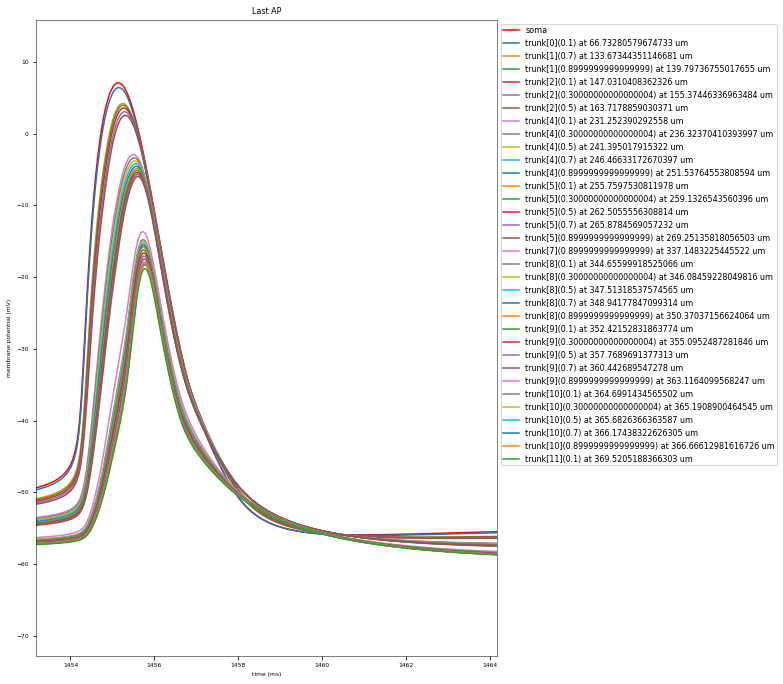

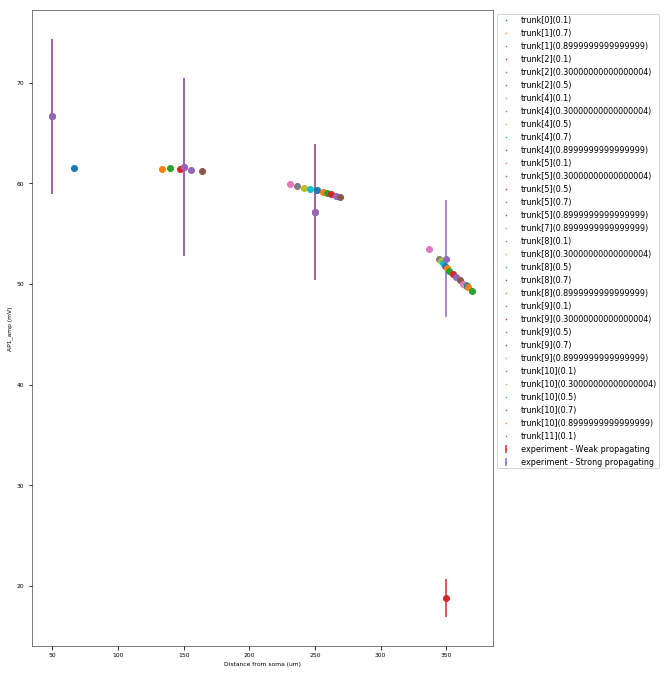

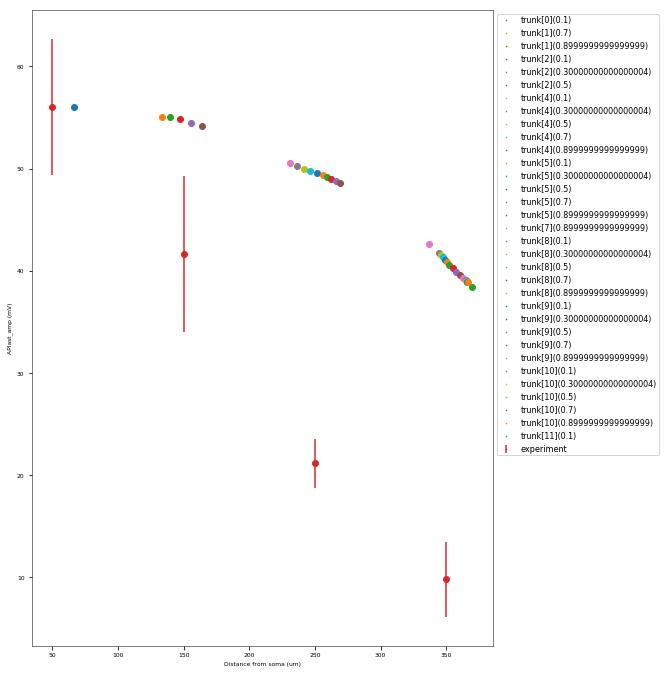

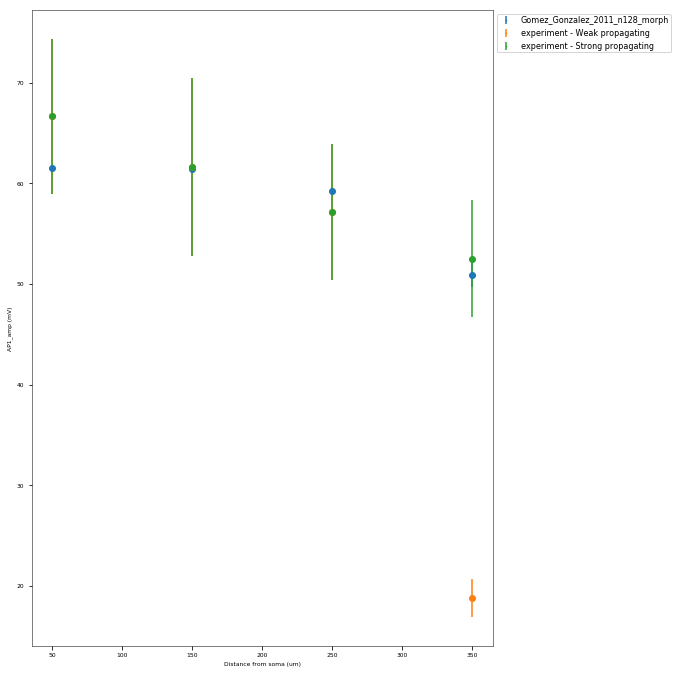

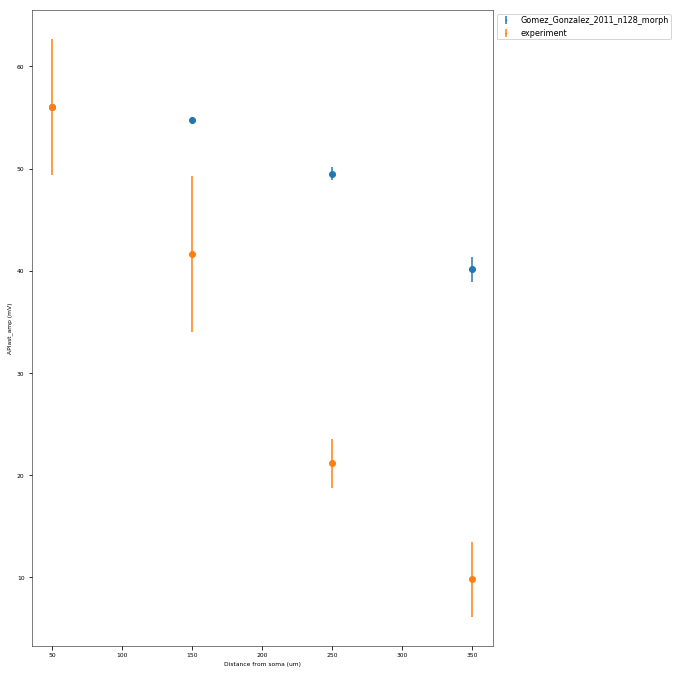

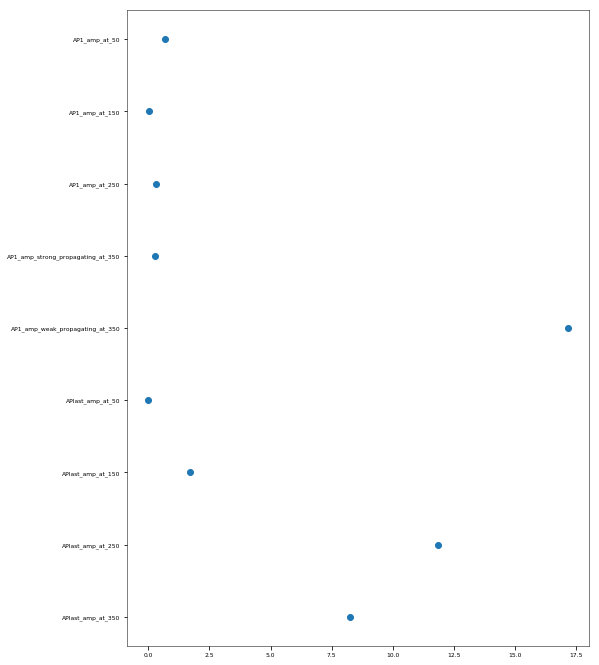

This is a rather STRONG propagating model


In [10]:
# Load stimuli file
stim_file = pkg_resources.resource_filename("hippounit", "tests/stimuli/bAP_stim/stim_bAP_test.json")

with open(stim_file, 'r') as f:
    config = json.load(f, object_pairs_hook=collections.OrderedDict)

# Instantiate the test class
test = tests.BackpropagatingAPTest(config=config, observation=observation, force_run=False, force_run_FindCurrentStim=False, show_plot=True, save_all=True, base_directory=base_directory)

# Number of parallel processes
test.npool = 10

try: 
    # Run the test
    score = test.judge(model)
    #Summarize and print the score achieved by the model on the test using SciUnit's summarize function
    score.summarize()
except Exception as e:
    print('Model: ' + model.name + ' could not be run')
    print(e)
    pass 

### Depolarization-block Test

The Depolarization Block Test aims to determine whether the model enters depolarization block to prolonged, high intensity somatic current stimulus. It compares the current intensity to which the model fires the maximum number of action potentials, the current intensity before the model enters depolarization block (the two should be equal) and the equilibrium potential during depolarization block to the experimental data of Bianchi et al. 2012 (http://dx.doi.org/10.1007/s10827-012-0383-y).

In [11]:
# Load target data
with open('../target_features/depol_block_target_data.json') as f:
    observation = json.load(f, object_pairs_hook=collections.OrderedDict)

IPython.display.HTML(json2html.convert(json = observation))

mean_Ith,0.6 nA
Ith_std,0.3 nA
mean_Veq,-40.1 mV
Veq_std,3.4 mV


- running amplitude: 0.4 on model: Gomez_Gonzalez_2011_n128_morph at: soma[0](0.5)
- running amplitude: 0.0 on model: Gomez_Gonzalez_2011_n128_morph at: soma[0](0.5)
- running amplitude: 0.25 on model: Gomez_Gonzalez_2011_n128_morph at: soma[0](0.5)
- running amplitude: 0.1 on model: Gomez_Gonzalez_2011_n128_morph at: soma[0](0.5)
- running amplitude: 0.35000000000000003 on model: Gomez_Gonzalez_2011_n128_morph at: soma[0](0.5)
- running amplitude: 0.30000000000000004 on model: Gomez_Gonzalez_2011_n128_morph at: soma[0](0.5)
- running amplitude: 0.45 on model: Gomez_Gonzalez_2011_n128_morph at: soma[0](0.5)
- running amplitude: 0.05 on model: Gomez_Gonzalez_2011_n128_morph at: soma[0](0.5)
- running amplitude: 0.15000000000000002 on model: Gomez_Gonzalez_2011_n128_morph at: soma[0](0.5)
- running amplitude: 0.2 on model: Gomez_Gonzalez_2011_n128_morph at: soma[0](0.5)
- running amplitude: 0.5 on model: Gomez_Gonzalez_2011_n128_morph at: soma[0](0.5)
- running amplitude: 0.55 on model: 

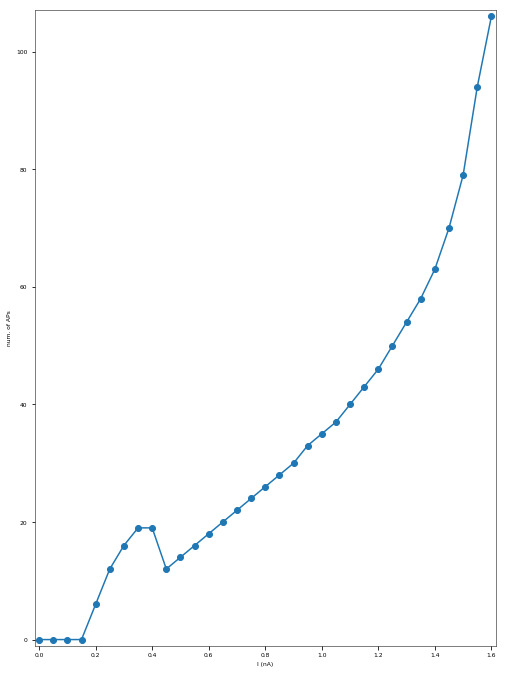

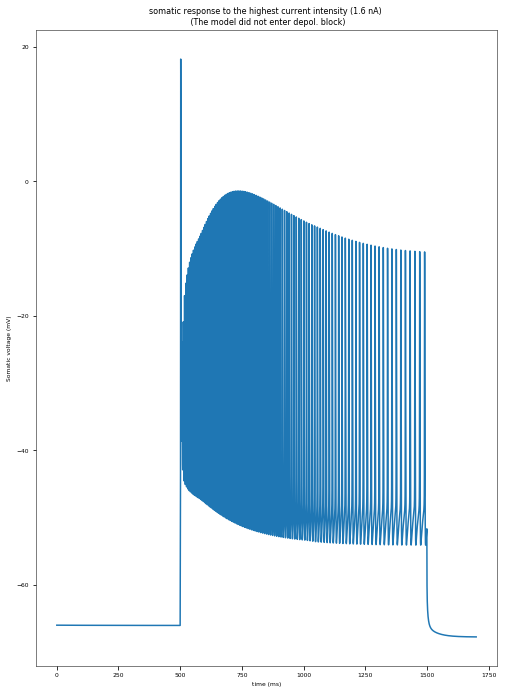

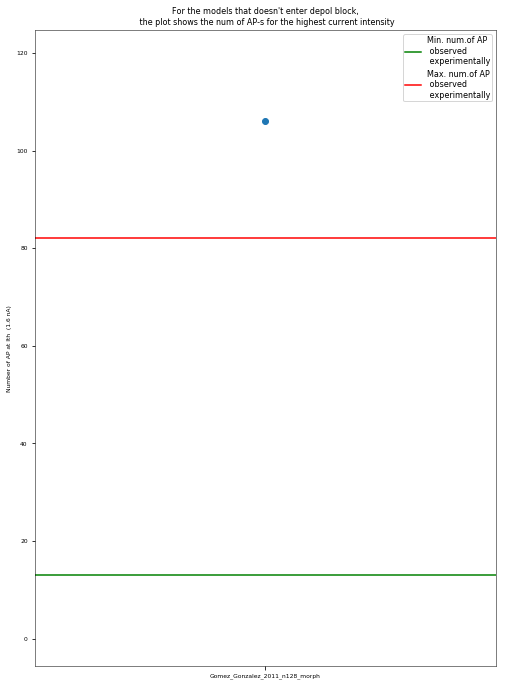

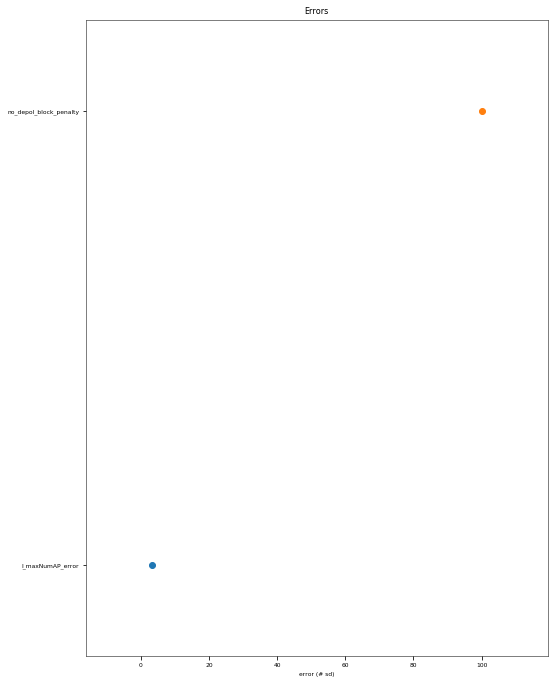

The model did not enter depolarization block.


In [12]:
# Instantiate the test class

test = tests.DepolarizationBlockTest(observation=observation, force_run=False, show_plot=True, save_all=True, base_directory=base_directory)

# Number of parallel processes
test.npool = 10

try: 
    # Run the test
    score = test.judge(model)
    #Summarize and print the score achieved by the model on the test using SciUnit's summarize function
    score.summarize()
except Exception as e:
    print('Model: ' + model.name + ' could not be run')
    print(e)
    pass 

### Oblique Integration Test

Tests signal integration in oblique dendrites for increasing number of synchronous and asynchronous synaptic inputs. The experimental data is obtained from Losonczy and Magee 2006 (https://doi.org/10.1016/j.neuron.2006.03.016).

In [13]:
# Load target data
with open('../target_features/oblique_target_data.json') as f:
    observation = json.load(f, object_pairs_hook=collections.OrderedDict)

IPython.display.HTML(json2html.convert(json = observation))

mean_threshold,3.4 mV
threshold_sem,0.2 mV
exp_n,92
mean_prox_threshold,4.5 mV
prox_threshold_sem,0.5 mV
prox_n,33
mean_dist_threshold,2.6 mV
dist_threshold_sem,0.2 mV
dist_n,44
mean_nonlin_at_th,142
nonlin_at_th_sem,9


Dendrites and locations to be tested:  [['apical_dendrite[115]', 0.1, 'prox'], ['apical_dendrite[115]', 0.30000000000000004, 'dist']]
Adjusting synaptic weights on all the locations ...
The dendritic spike at dendrite apical_dendrite[115](0.1) generated somatic AP - this location is not used in the test
- number of inputs: 1 dendrite: apical_dendrite[115] xloc: 0.30000000000000004
- number of inputs: 0 dendrite: apical_dendrite[115] xloc: 0.30000000000000004
- number of inputs: 2 dendrite: apical_dendrite[115] xloc: 0.30000000000000004
- number of inputs: 3 dendrite: apical_dendrite[115] xloc: 0.30000000000000004
- number of inputs: 4 dendrite: apical_dendrite[115] xloc: 0.30000000000000004
- number of inputs: 9 dendrite: apical_dendrite[115] xloc: 0.30000000000000004
- number of inputs: 5 dendrite: apical_dendrite[115] xloc: 0.30000000000000004
- number of inputs: 6 dendrite: apical_dendrite[115] xloc: 0.30000000000000004
- number of inputs: 7 dendrite: apical_dendrite[115] xloc: 0.30

/home/saray/venv_Python3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/saray/venv_Python3/lib/python3.5/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/saray/venv_Python3/lib/python3.5/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/saray/venv_Python3/lib/python3.5/site-packages/numpy/core/_methods.py:110: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/home/saray/venv_Python3/lib/python3.5/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Results are saved in the directory:  ../published_models_validation_results/results/oblique_integration/Gomez_Gonzalez_2011_n128_morph/


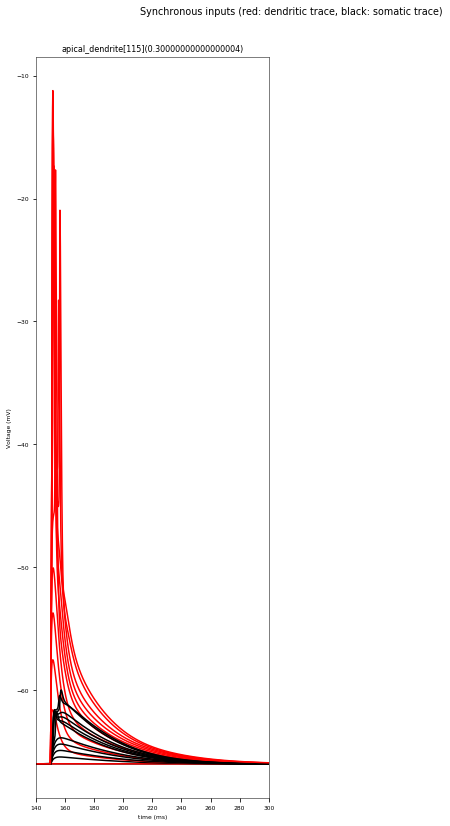

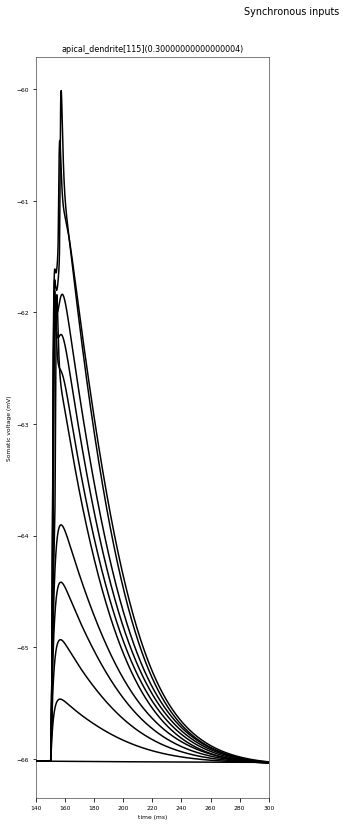

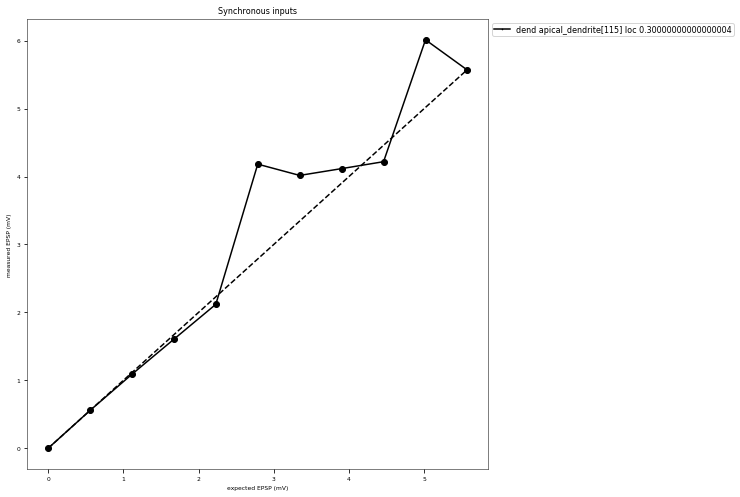

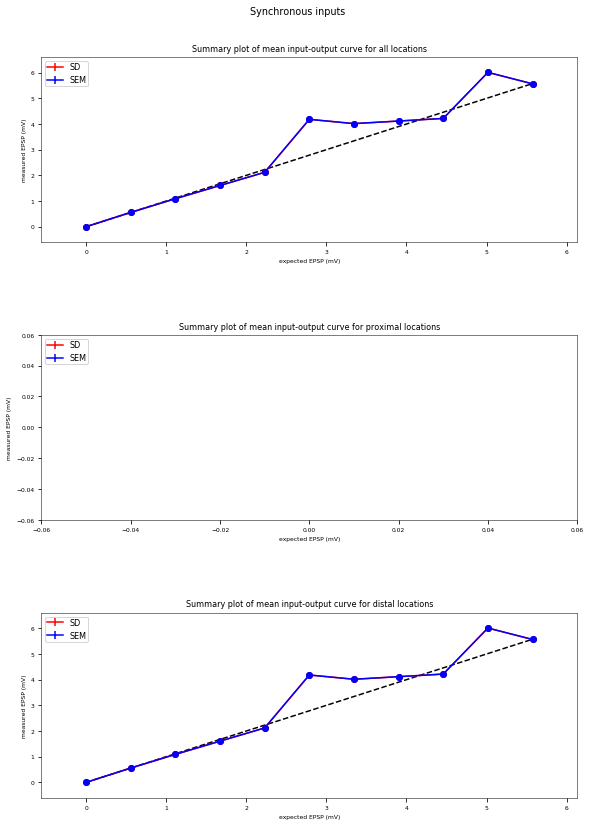

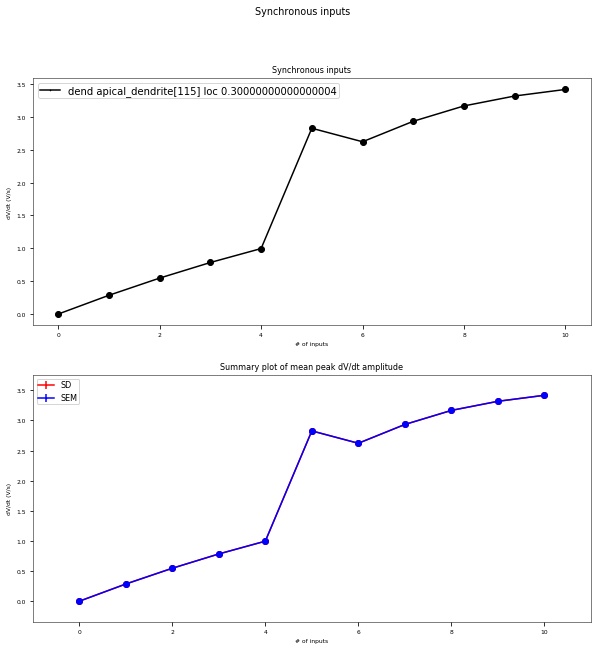

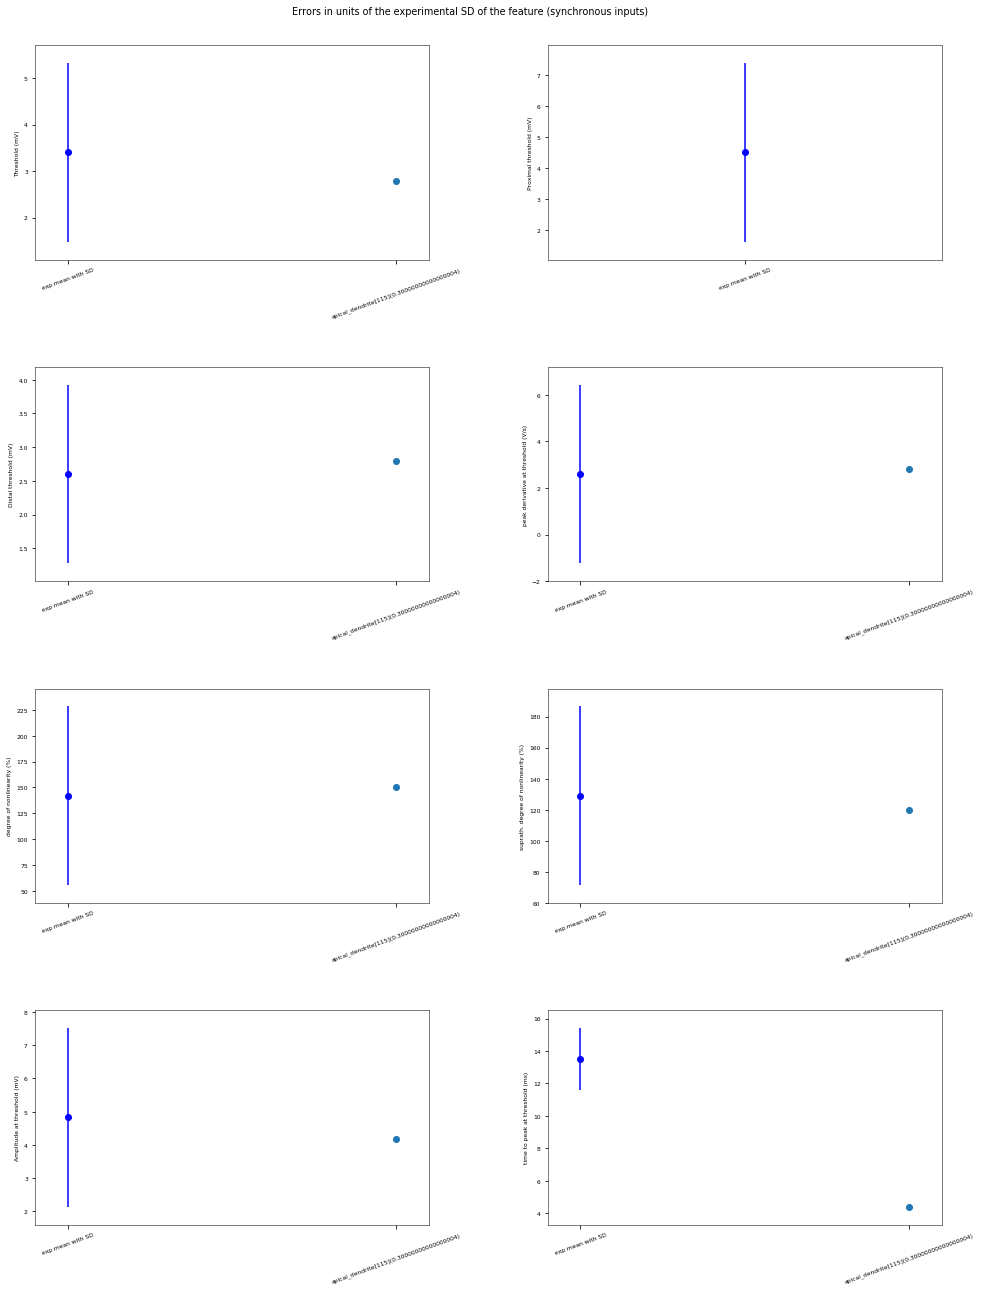

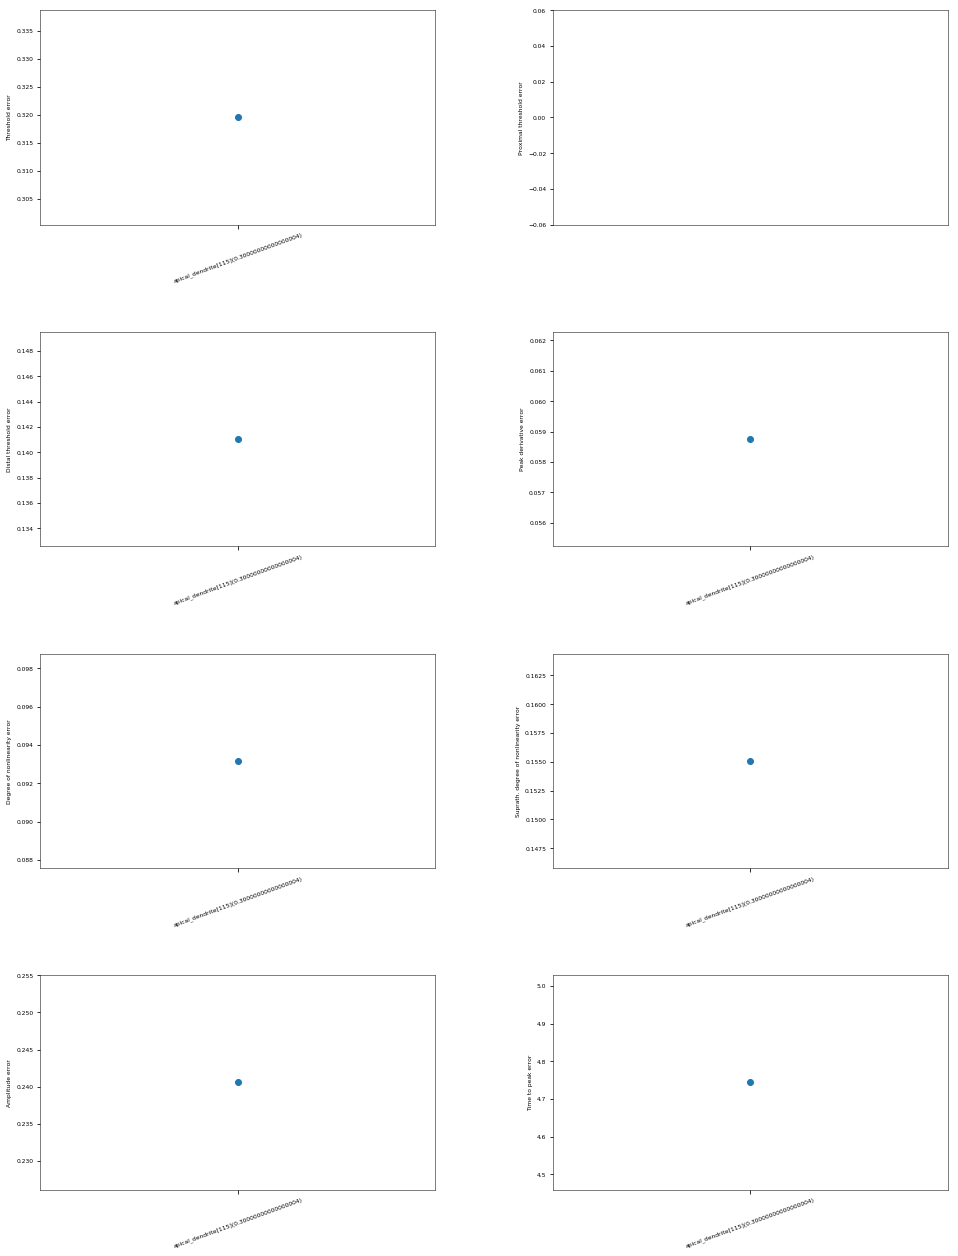

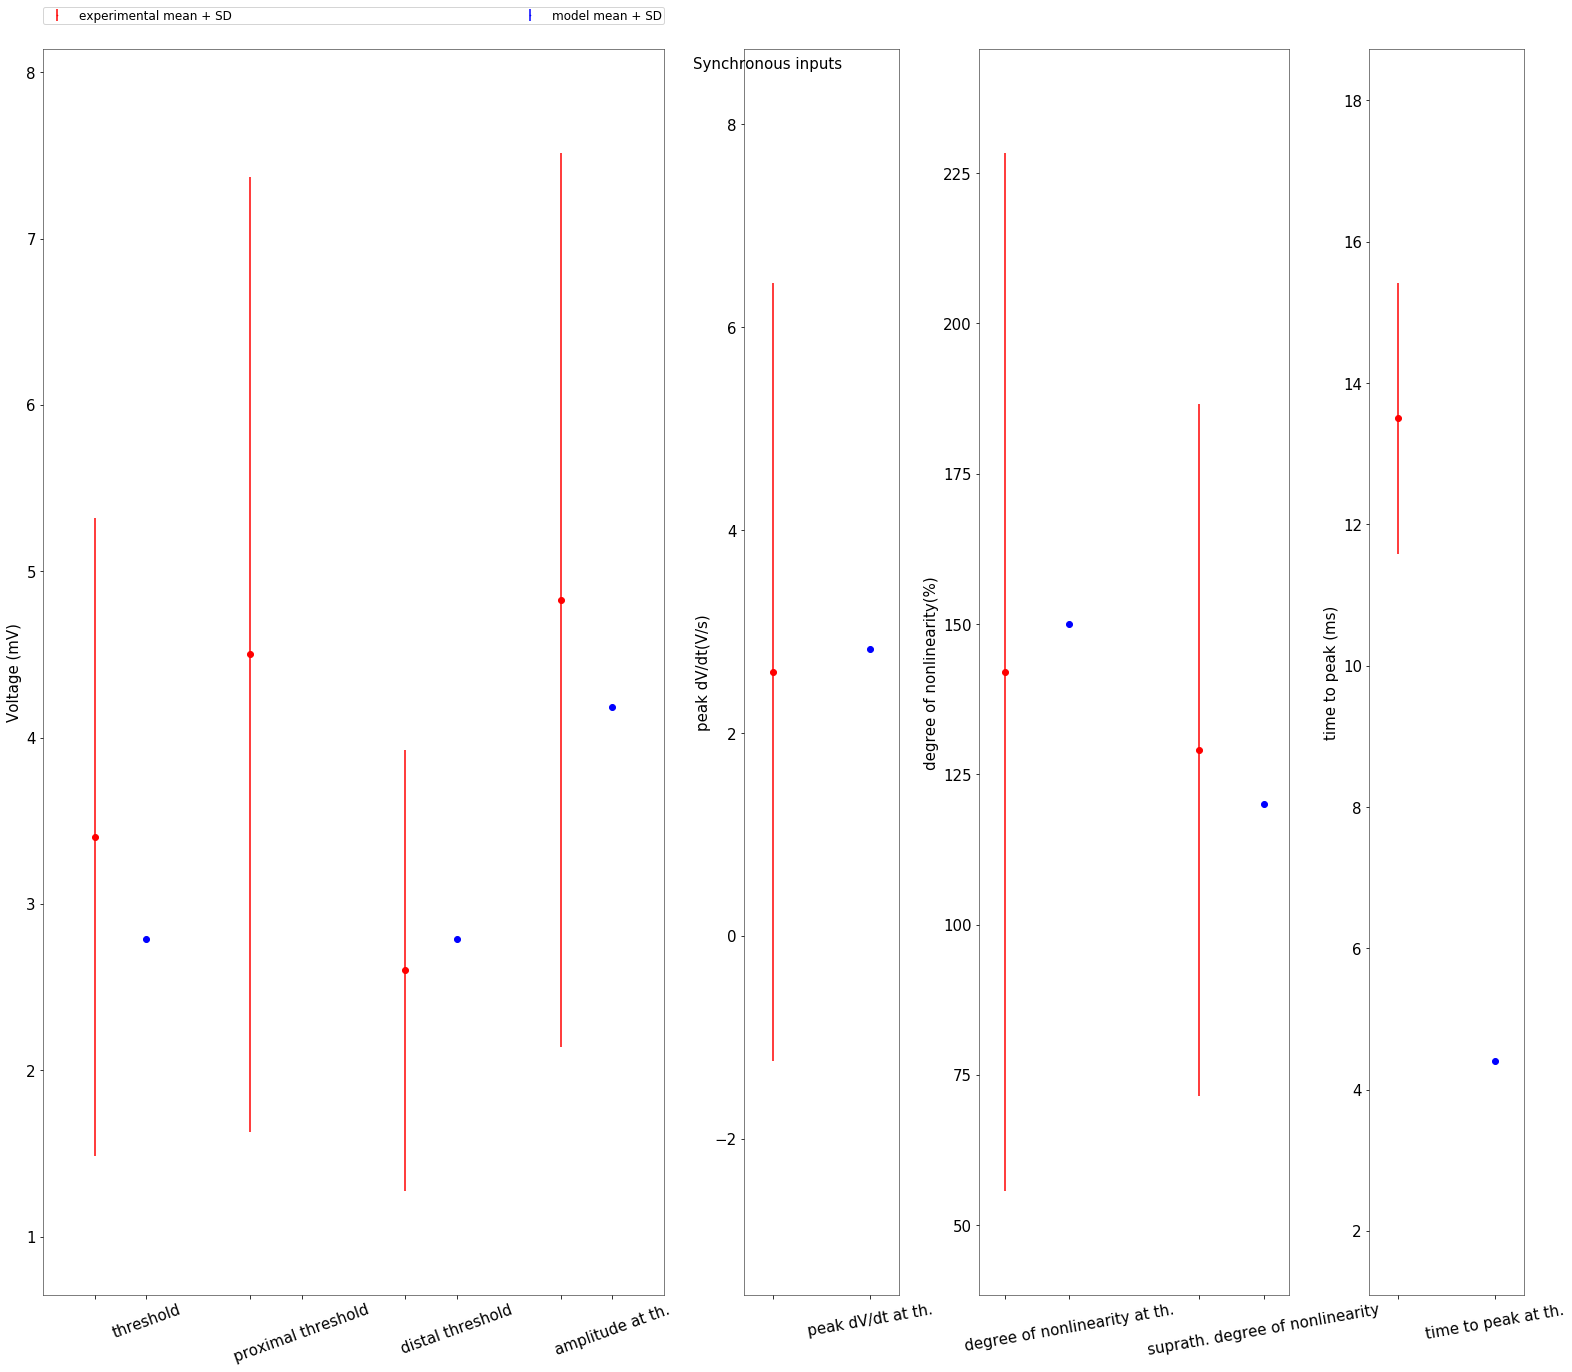

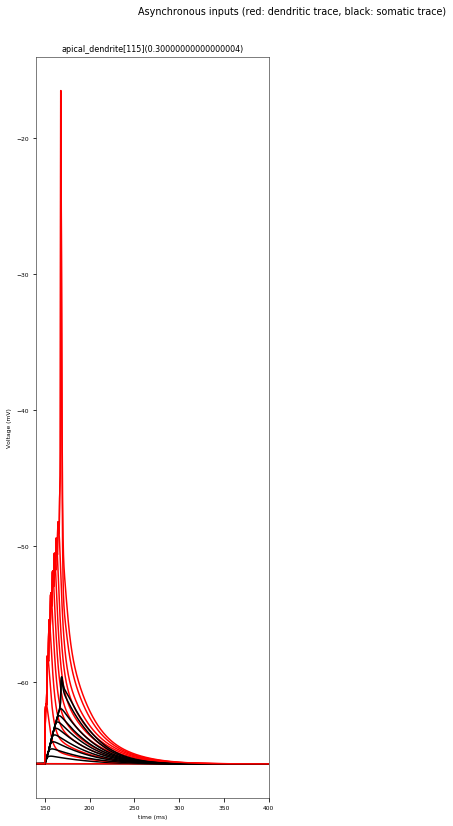

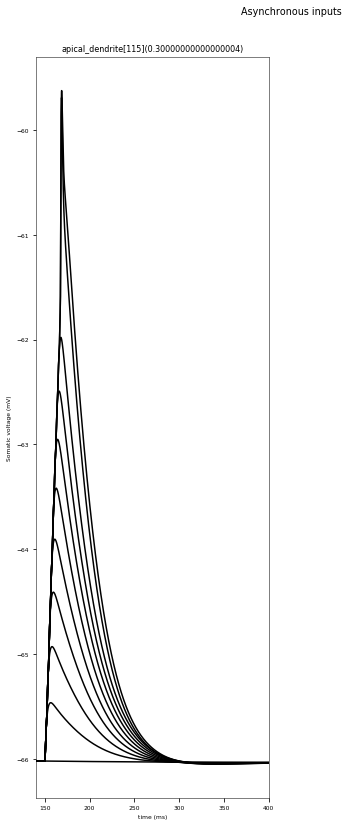

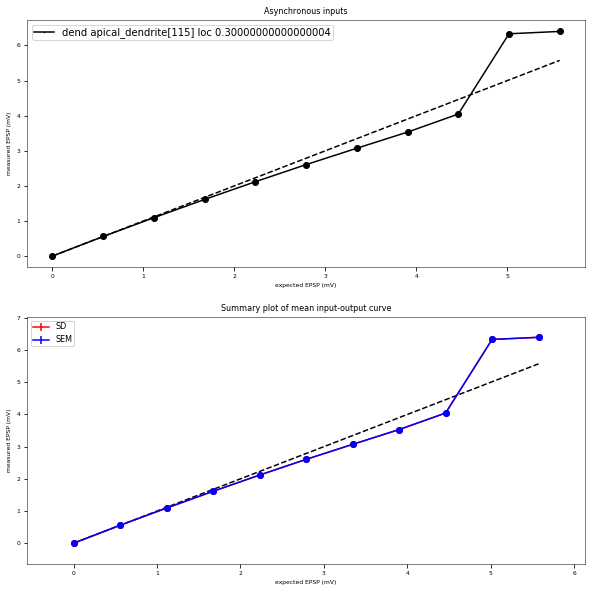

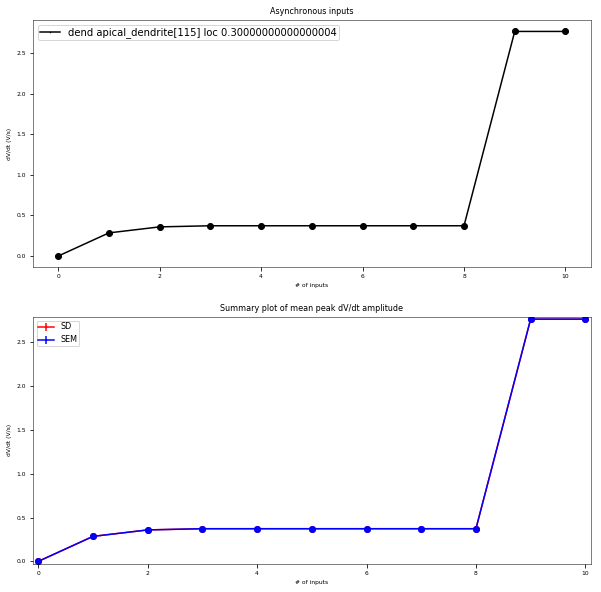

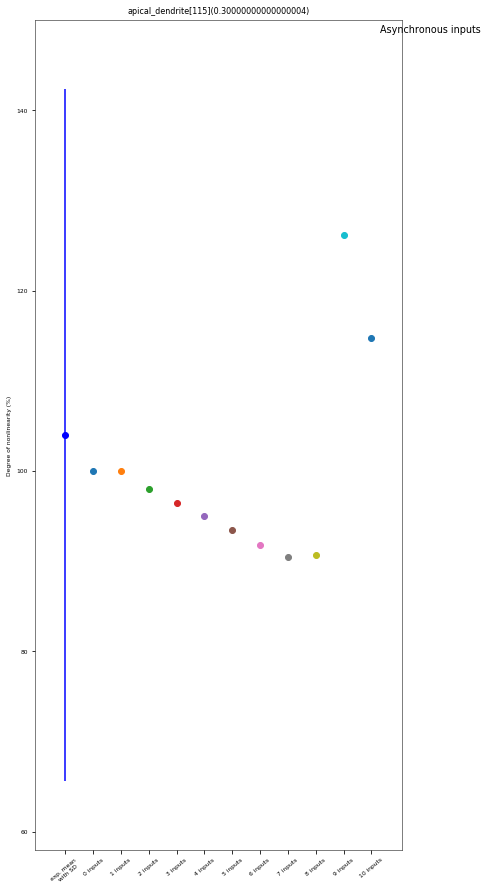

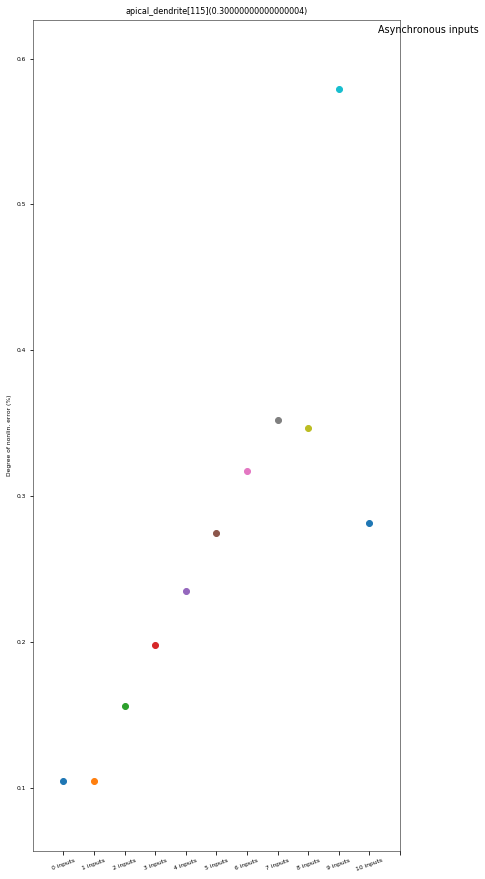

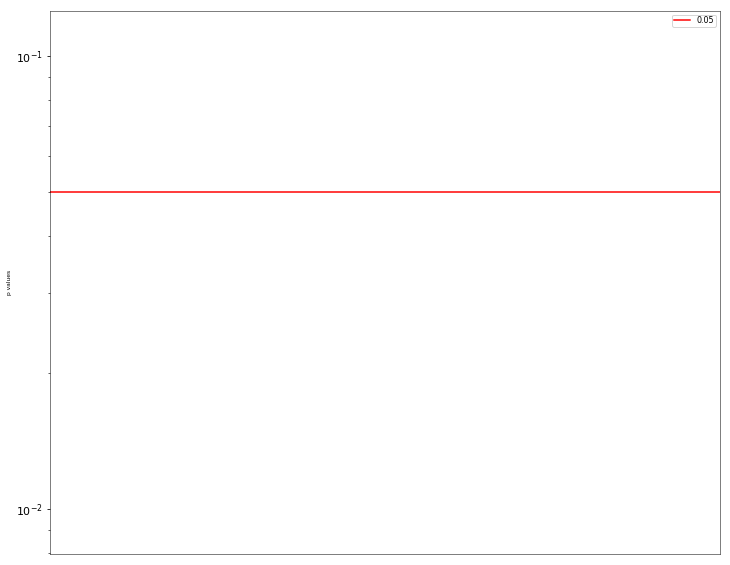

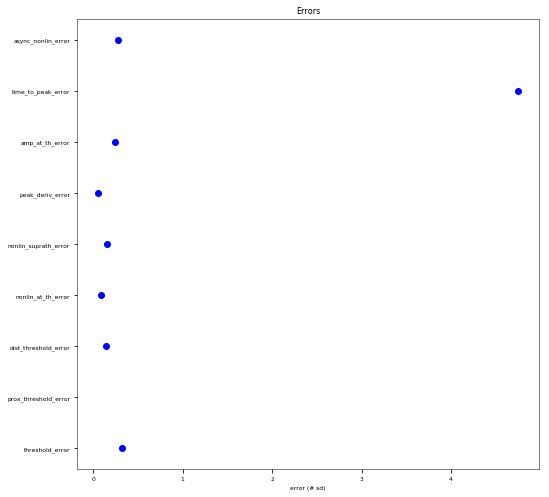

In [14]:
#setting synapse parameters

# If model.AMPA_name and/or model.NMDA_name is set here, the model's own receptor models (mod files) are used. 
# If these are not set, HippoUnit's default synapse model is used. (AMPA: NEURON's Exp2Syn, NMDA: https://github.com/KaliLab/hippounit/blob/master/hippounit/tests/default_NMDAr/NMDA_CA1_pyr_SC.mod) 

model.NMDA_name = 'NMDA'
model.AMPA_name = 'GLU'
model.AMPA_NMDA_ratio = 1/0.396

# Instantiate the test class
test = tests.ObliqueIntegrationTest(observation = observation, save_all = True, force_run_synapse=False, force_run_bin_search=False, show_plot = True, base_directory = base_directory)

# Number of parallel processes
test.npool = 10

try: 
    # Run the test
    score = test.judge(model)
    #Summarize and print the score achieved by the model on the test using SciUnit's summarize function
    score.summarize()
except Exception as e:
    print('Model: ' + model.name + ' could not be run')
    print(e)
    pass 

In [15]:
%load_ext watermark

In [16]:
%watermark -v -m -p sciunit,efel,numpy,quantities,scipy,matplotlib,neuron

CPython 3.5.2
IPython 5.6.0

sciunit 0.2.1.1
efel 3.0.58
numpy 1.16.4
quantities 0.12.1
scipy 1.3.0
matplotlib 3.0.3
neuron 7.6.2

compiler   : GCC 5.4.0 20160609
system     : Linux
release    : 4.15.0-60-generic
machine    : x86_64
processor  : x86_64
CPU cores  : 56
interpreter: 64bit
